In [1]:
# -*- coding: utf-8 -*-
import pandas as pd
import sys
import matplotlib.pyplot as plt
import numpy as np

#使用pandas模組讀取excel資料;u表示unicode編碼;sheetname=1表示第二張工作表，0表示第一張;skiprows=3表示前四行略過
#df = pd.read_excel(u'K:\\20171027資料前處理\\降水分級20171108\\降水溫度序列_無資料年補0.xlsx',sheetname=3,skiprows=2)
df = pd.read_excel(u'K:\\20171027資料前處理\\降水分級20171108\\18-降水分級-分區時間序列(平均)-20171114.xlsx',sheetname=3,skiprows=2)
#顯示前5行資料
df.head()

,年,North_annual,Central_annual,South_annual,North_Winter,Central_winter,South_winter,North_summer,Central_summer,South_summer
0,1644,-0.241379,-0.475000,1.000000,-0.454545,0.166667,1.0,-0.714286,-1.034483,0.000000
1,1645,-0.045455,0.576923,1.000000,-0.250000,0.285714,0.0,-0.100000,0.142857,1.000000
2,1646,0.052632,-0.705128,0.000000,-1.142857,-0.100000,0.0,0.352941,-1.295082,0.000000
3,1647,0.384615,0.235294,0.666667,0.450000,-0.153846,0.0,0.684211,0.130435,0.666667
4,1648,0.576923,0.060606,0.000000,0.000000,0.529412,0.0,0.480000,0.090909,0.000000


In [2]:
%matplotlib inline

# My Heading

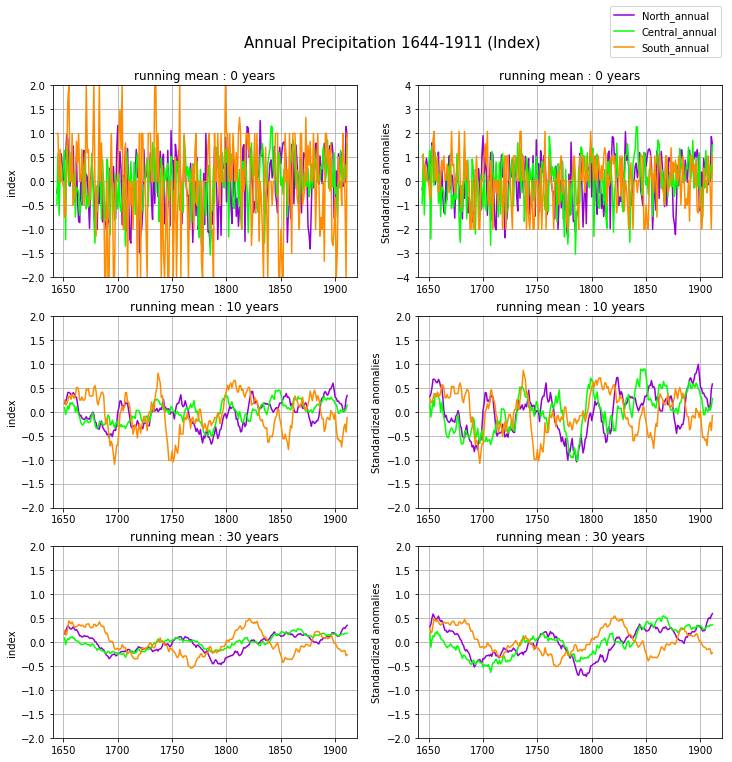

In [3]:
# 創建一個 12 * 12 英吋的圖，並設置分辨率為 200
#Fig_ts = plt.figure(figsize=(12,12), dpi=200)
Fig_ts = plt.figure(figsize=(12,12))

#321表示6張圖的左邊第一張
#圖的順序是由上而下由左而右來算的。而第三位碼就是拿來指定第幾張圖的
plt.subplot(321)
plt.title('running mean : 0 years')
plt.xlim(1640,1920)
plt.ylim(-2,2)
plt.grid(True)
plt.ylabel('index')

#華北
plt.plot(df.iloc[:,0],df.iloc[:,1], color='darkviolet')
#華中
plt.plot(df.iloc[:,0],df.iloc[:,2], color='lime')
#華南
plt.plot(df.iloc[:,0],df.iloc[:,3], color='darkorange')

#plt.legend(loc = 1)
plt.legend(loc = 1, bbox_to_anchor=(2.00,1.1),borderaxespad = -6.)

#323表示6張圖的左邊第二張
plt.subplot(323)
plt.title('running mean : 10 years')
plt.xlim(1640,1920)
plt.ylim(-2,2)
plt.grid(True)
plt.ylabel('index')
#華北10年華動平均
rm10 =  df.iloc[:,1].rolling(10, min_periods=8).mean()
plt.plot(df.iloc[:,0], rm10, color='darkviolet')
#華中10年華動平均
rm10 =  df.iloc[:,2].rolling(10, min_periods=8).mean()
plt.plot(df.iloc[:,0], rm10, color='lime')
#華南10年華動平均
rm10 =  df.iloc[:,3].rolling(10, min_periods=8).mean()
plt.plot(df.iloc[:,0], rm10, color='darkorange')

#325表示6張圖的左邊第三張
plt.subplot(325)
plt.title('running mean : 30 years')
plt.xlim(1640,1920)
plt.ylim(-2,2)
plt.grid(True)
plt.ylabel('index')
#華北10年華動平均
rm10 =  df.iloc[:,1].rolling(30, min_periods=8).mean()
plt.plot(df.iloc[:,0], rm10, color='darkviolet')
#華中10年華動平均
rm10 =  df.iloc[:,2].rolling(30, min_periods=8).mean()
plt.plot(df.iloc[:,0], rm10, color='lime')
#華南10年華動平均
rm10 =  df.iloc[:,3].rolling(30, min_periods=8).mean()
plt.plot(df.iloc[:,0], rm10, color='darkorange')

#Standardized anomalies, also referred to as normalized anomalies, 
#are calculated by dividing anomalies by the limatological standard deviation.

#Standardized anomalies North China 華北
SAN = []
#time series mean
tm = df.iloc[:,1].mean()
#time series standard deviation
td = df.iloc[:,1].std()

for i in range(len(df)):

    if df.iloc[i,1] is None:
        SAN.append(df.iloc[i,1])
    else:
        #standardize anomalize
        diff = (df.iloc[i,1] - tm) / td
        SAN.append(diff)
#322表示6張圖的右邊第一張
plt.subplot(322)
plt.title('running mean : 0 years')
plt.xlim(1640,1920)
plt.ylim(-4,4)
plt.grid(True)
plt.ylabel('Standardized anomalies')
#華北
plt.plot(df.iloc[:,0], SAN, color='darkviolet')

#Standardized anomalies Central China 華中
SAC = []
#time series mean
tm = df.iloc[:,2].mean()
#time series standard deviation
td = df.iloc[:,2].std()

for i in range(len(df)):

    if df.iloc[i,2] is None:
        SAC.append(df.iloc[i,2])
    else:
        #standardize anomalize
        diff = (df.iloc[i,2] - tm) / td
        SAC.append(diff)
#322表示6張圖的右邊第一張
plt.subplot(322)
plt.title('running mean : 0 years')
plt.xlim(1640,1920)
plt.ylim(-4,4)
plt.grid(True)
plt.ylabel('Standardized anomalies')
#華中
plt.plot(df.iloc[:,0], SAC, color='lime')

#Standardized anomalies South China 華南
SAS = []
#time series mean
tm = df.iloc[:,3].mean()
#time series standard deviation
td = df.iloc[:,3].std()

for i in range(len(df)):

    if df.iloc[i,3] is None:
        SAS.append(df.iloc[i,3])
    else:
        #standardize anomalize
        diff = (df.iloc[i,3] - tm) / td
        SAS.append(diff)
#322表示6張圖的右邊第一張
plt.subplot(322)
plt.title('running mean : 0 years')
plt.xlim(1640,1920)
plt.ylim(-4,4)
plt.grid(True)
plt.ylabel('Standardized anomalies')
#華南
plt.plot(df.iloc[:,0], SAS, color='darkorange')

#324表示6張圖的右邊第二張
plt.subplot(324)
plt.title('running mean : 10 years')
plt.xlim(1640,1920)
plt.ylim(-2,2)
plt.grid(True)
plt.ylabel('Standardized anomalies')
#華北
SAN = pd.DataFrame({'standardize anomalies' : SAN})
SANrm10 = SAN.rolling(10, min_periods=8).mean()
plt.plot(df.iloc[:,0], SANrm10, color='darkviolet')
#華中
SAC = pd.DataFrame({'standardize anomalies' : SAC})
SACrm10 = SAC.rolling(10, min_periods=8).mean()
plt.plot(df.iloc[:,0], SACrm10, color='lime')
#華南
SAS = pd.DataFrame({'standardize anomalies' : SAS})
SASrm10 = SAS.rolling(10, min_periods=8).mean()
plt.plot(df.iloc[:,0], SASrm10, color='darkorange')

#326表示6張圖的右邊第三張
plt.subplot(326)
plt.title('running mean : 30 years')
plt.xlim(1640,1920)
plt.ylim(-2,2)
#plt.yticks((-2,-1,0,1,2))
plt.grid(True)
plt.ylabel('Standardized anomalies')
#華北
#SAN = pd.DataFrame({'standardize anomalies' : SAN})
SANrm30 = SAN.rolling(30, min_periods=8).mean()
plt.plot(df.iloc[:,0], SANrm30, color='darkviolet')
#華中
#SAC = pd.DataFrame({'standardize anomalies' : SAC})
SACrm30 = SAC.rolling(30, min_periods=8).mean()
plt.plot(df.iloc[:,0], SACrm30, color='lime')
#華南
#SAS = pd.DataFrame({'standardize anomalies' : SAS})
SASrm30 = SAS.rolling(30, min_periods=8).mean()
plt.plot(df.iloc[:,0], SASrm30, color='darkorange')

#title
plt.text(1480.5, 12.4, 'Annual Precipitation 1644-1911 (Index)',fontsize=15)


#plt.suptitle('Annual Precipitation 1644-1795 (Index)', fontsize=16)

plt.savefig('annual_Precipitation_20180105.jpg')
plt.show()

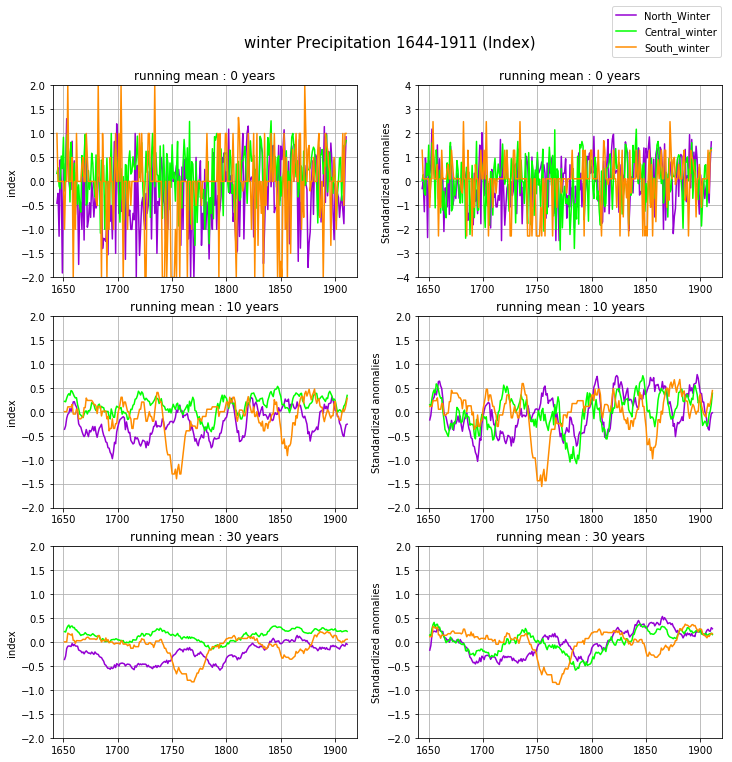

In [4]:
# 創建一個 12 * 12 英吋的圖，並設置分辨率為 200
#Fig_ts = plt.figure(figsize=(12,12), dpi=200)
Fig_ts = plt.figure(figsize=(12,12))

#321表示6張圖的左邊第一張
#圖的順序是由上而下由左而右來算的。而第三位碼就是拿來指定第幾張圖的
plt.subplot(321)
plt.title('running mean : 0 years')
plt.xlim(1640,1920)
plt.ylim(-2,2)
plt.grid(True)
plt.ylabel('index')

#冷華北
plt.plot(df.iloc[:,0],df.iloc[:,4], color='darkviolet')
#冷華中
plt.plot(df.iloc[:,0],df.iloc[:,5], color='lime')
#冷華南
plt.plot(df.iloc[:,0],df.iloc[:,6], color='darkorange')

#plt.legend(loc = 1)
plt.legend(loc = 1, bbox_to_anchor=(2.00,1.1),borderaxespad = -6.)

#323表示6張圖的左邊第二張
plt.subplot(323)
plt.title('running mean : 10 years')
plt.xlim(1640,1920)
plt.ylim(-2,2)
plt.grid(True)
plt.ylabel('index')
#冷華北10年華動平均
rm10 =  df.iloc[:,4].rolling(10, min_periods=8).mean()
plt.plot(df.iloc[:,0], rm10, color='darkviolet')
#冷華中10年華動平均
rm10 =  df.iloc[:,5].rolling(10, min_periods=8).mean()
plt.plot(df.iloc[:,0], rm10, color='lime')
#冷華南10年華動平均
rm10 =  df.iloc[:,6].rolling(10, min_periods=8).mean()
plt.plot(df.iloc[:,0], rm10, color='darkorange')

#325表示6張圖的左邊第三張
plt.subplot(325)
plt.title('running mean : 30 years')
plt.xlim(1640,1920)
plt.ylim(-2,2)
plt.grid(True)
plt.ylabel('index')
#冷華北30年華動平均
rm10 =  df.iloc[:,4].rolling(30, min_periods=8).mean()
plt.plot(df.iloc[:,0], rm10, color='darkviolet')
#冷華中30年華動平均
rm10 =  df.iloc[:,5].rolling(30, min_periods=8).mean()
plt.plot(df.iloc[:,0], rm10, color='lime')
#冷華南30年華動平均
rm10 =  df.iloc[:,6].rolling(30, min_periods=8).mean()
plt.plot(df.iloc[:,0], rm10, color='darkorange')

#Standardized anomalies, also referred to as normalized anomalies, 
#are calculated by dividing anomalies by the limatological standard deviation.

#Standardized anomalies North China 華北
SAN = []
#time series mean
tm = df.iloc[:,4].mean()
#time series standard deviation
td = df.iloc[:,4].std()

for i in range(len(df)):

    if df.iloc[i,4] is None:
        SAN.append(df.iloc[i,4])
    else:
        #standardize anomalize
        diff = (df.iloc[i,4] - tm) / td
        SAN.append(diff)
#322表示6張圖的右邊第一張
plt.subplot(322)
plt.title('running mean : 0 years')
plt.xlim(1640,1920)
plt.ylim(-4,4)
plt.grid(True)
plt.ylabel('Standardized anomalies')
#冷華北
plt.plot(df.iloc[:,0], SAN, color='darkviolet')

#Standardized anomalies Central China 華中
SAC = []
#time series mean
tm = df.iloc[:,5].mean()
#time series standard deviation
td = df.iloc[:,5].std()

for i in range(len(df)):

    if df.iloc[i,5] is None:
        SAC.append(df.iloc[i,5])
    else:
        #standardize anomalize
        diff = (df.iloc[i,5] - tm) / td
        SAC.append(diff)
#322表示6張圖的右邊第一張
plt.subplot(322)
plt.title('running mean : 0 years')
plt.xlim(1640,1920)
plt.ylim(-4,4)
plt.grid(True)
plt.ylabel('Standardized anomalies')
#冷華中
plt.plot(df.iloc[:,0], SAC, color='lime')

#Standardized anomalies South China 華南
SAS = []
#time series mean
tm = df.iloc[:,6].mean()
#time series standard deviation
td = df.iloc[:,6].std()

for i in range(len(df)):

    if df.iloc[i,6] is None:
        SAS.append(df.iloc[i,6])
    else:
        #standardize anomalize
        diff = (df.iloc[i,6] - tm) / td
        SAS.append(diff)
#322表示6張圖的右邊第一張
plt.subplot(322)
plt.title('running mean : 0 years')
plt.xlim(1640,1920)
plt.ylim(-4,4)
plt.grid(True)
plt.ylabel('Standardized anomalies')
#冷華南
plt.plot(df.iloc[:,0], SAS, color='darkorange')

#324表示6張圖的右邊第二張
plt.subplot(324)
plt.title('running mean : 10 years')
plt.xlim(1640,1920)
plt.ylim(-2,2)
plt.grid(True)
plt.ylabel('Standardized anomalies')
#冷華北
SAN = pd.DataFrame({'standardize anomalies' : SAN})
SANrm10 = SAN.rolling(10, min_periods=8).mean()
plt.plot(df.iloc[:,0], SANrm10, color='darkviolet')
#冷華中
SAC = pd.DataFrame({'standardize anomalies' : SAC})
SACrm10 = SAC.rolling(10, min_periods=8).mean()
plt.plot(df.iloc[:,0], SACrm10, color='lime')
#冷華南
SAS = pd.DataFrame({'standardize anomalies' : SAS})
SASrm10 = SAS.rolling(10, min_periods=8).mean()
plt.plot(df.iloc[:,0], SASrm10, color='darkorange')

#326表示6張圖的右邊第三張
plt.subplot(326)
plt.title('running mean : 30 years')
plt.xlim(1640,1920)
plt.ylim(-2,2)
#plt.yticks((-2,-1,0,1,2))
plt.grid(True)
plt.ylabel('Standardized anomalies')
#冷華北
#SAN = pd.DataFrame({'standardize anomalies' : SAN})
SANrm30 = SAN.rolling(30, min_periods=8).mean()
plt.plot(df.iloc[:,0], SANrm30, color='darkviolet')
#冷華中
#SAC = pd.DataFrame({'standardize anomalies' : SAC})
SACrm30 = SAC.rolling(30, min_periods=8).mean()
plt.plot(df.iloc[:,0], SACrm30, color='lime')
#冷華南
#SAS = pd.DataFrame({'standardize anomalies' : SAS})
SASrm30 = SAS.rolling(30, min_periods=8).mean()
plt.plot(df.iloc[:,0], SASrm30, color='darkorange')

#title
plt.text(1480.5, 12.4, 'winter Precipitation 1644-1911 (Index)',fontsize=15)


#plt.suptitle('Annual Precipitation 1644-1795 (Index)', fontsize=16)

plt.savefig('winter_Precipitation_20180105.jpg')
plt.show()

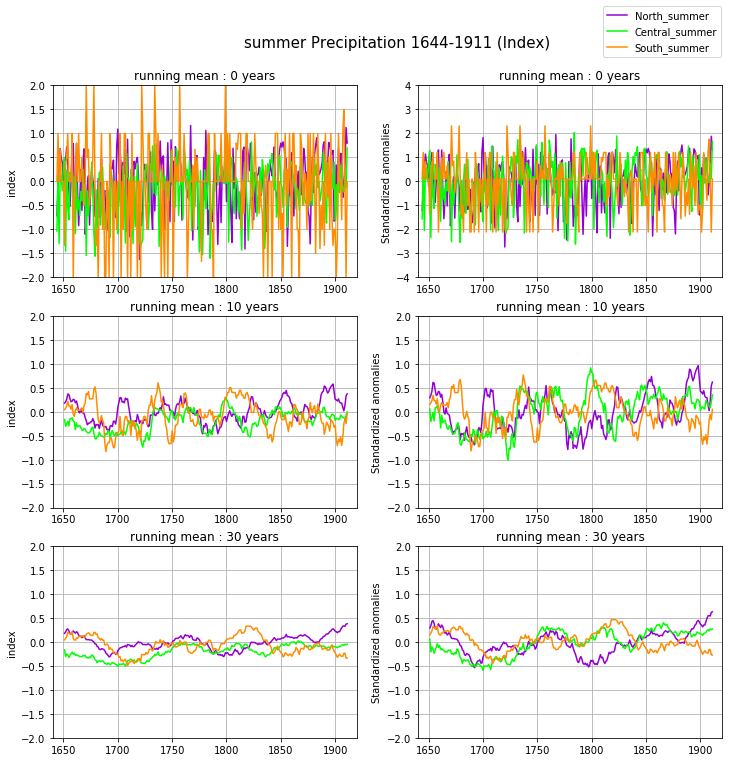

In [5]:
# 創建一個 12 * 12 英吋的圖，並設置分辨率為 200
#Fig_ts = plt.figure(figsize=(12,12), dpi=200)
Fig_ts = plt.figure(figsize=(12,12))

#321表示6張圖的左邊第一張
#圖的順序是由上而下由左而右來算的。而第三位碼就是拿來指定第幾張圖的
plt.subplot(321)
plt.title('running mean : 0 years')
plt.xlim(1640,1920)
plt.ylim(-2,2)
plt.grid(True)
plt.ylabel('index')

#暖華北
plt.plot(df.iloc[:,0],df.iloc[:,7], color='darkviolet')
#暖華中
plt.plot(df.iloc[:,0],df.iloc[:,8], color='lime')
#暖華南
plt.plot(df.iloc[:,0],df.iloc[:,9], color='darkorange')

#plt.legend(loc = 1)
plt.legend(loc = 1, bbox_to_anchor=(2.00,1.1),borderaxespad = -6.)

#323表示6張圖的左邊第二張
plt.subplot(323)
plt.title('running mean : 10 years')
plt.xlim(1640,1920)
plt.ylim(-2,2)
plt.grid(True)
plt.ylabel('index')
#暖華北10年華動平均
rm10 =  df.iloc[:,7].rolling(10, min_periods=8).mean()
plt.plot(df.iloc[:,0], rm10, color='darkviolet')
#暖華中10年華動平均
rm10 =  df.iloc[:,8].rolling(10, min_periods=8).mean()
plt.plot(df.iloc[:,0], rm10, color='lime')
#暖華南10年華動平均
rm10 =  df.iloc[:,9].rolling(10, min_periods=8).mean()
plt.plot(df.iloc[:,0], rm10, color='darkorange')

#325表示6張圖的左邊第三張
plt.subplot(325)
plt.title('running mean : 30 years')
plt.xlim(1640,1920)
plt.ylim(-2,2)
plt.grid(True)
plt.ylabel('index')
#暖華北30年華動平均
rm10 =  df.iloc[:,7].rolling(30, min_periods=8).mean()
plt.plot(df.iloc[:,0], rm10, color='darkviolet')
#暖華中30年華動平均
rm10 =  df.iloc[:,8].rolling(30, min_periods=8).mean()
plt.plot(df.iloc[:,0], rm10, color='lime')
#暖華南30年華動平均
rm10 =  df.iloc[:,9].rolling(30, min_periods=8).mean()
plt.plot(df.iloc[:,0], rm10, color='darkorange')

#Standardized anomalies, also referred to as normalized anomalies, 
#are calculated by dividing anomalies by the limatological standard deviation.

#Standardized anomalies North China 華北
SAN = []
#time series mean
tm = df.iloc[:,7].mean()
#time series standard deviation
td = df.iloc[:,7].std()

for i in range(len(df)):

    if df.iloc[i,7] is None:
        SAN.append(df.iloc[i,7])
    else:
        #standardize anomalize
        diff = (df.iloc[i,7] - tm) / td
        SAN.append(diff)
#322表示6張圖的右邊第一張
plt.subplot(322)
plt.title('running mean : 0 years')
plt.xlim(1640,1920)
plt.ylim(-4,4)
plt.grid(True)
plt.ylabel('Standardized anomalies')
#暖華北
plt.plot(df.iloc[:,0], SAN, color='darkviolet')

#Standardized anomalies Central China 華中
SAC = []
#time series mean
tm = df.iloc[:,8].mean()
#time series standard deviation
td = df.iloc[:,8].std()

for i in range(len(df)):

    if df.iloc[i,8] is None:
        SAC.append(df.iloc[i,8])
    else:
        #standardize anomalize
        diff = (df.iloc[i,8] - tm) / td
        SAC.append(diff)
#322表示6張圖的右邊第一張
plt.subplot(322)
plt.title('running mean : 0 years')
plt.xlim(1640,1920)
plt.ylim(-4,4)
plt.grid(True)
plt.ylabel('Standardized anomalies')
#暖華中
plt.plot(df.iloc[:,0], SAC, color='lime')

#Standardized anomalies South China 華南
SAS = []
#time series mean
tm = df.iloc[:,9].mean()
#time series standard deviation
td = df.iloc[:,9].std()

for i in range(len(df)):

    if df.iloc[i,9] is None:
        SAS.append(df.iloc[i,9])
    else:
        #standardize anomalize
        diff = (df.iloc[i,9] - tm) / td
        SAS.append(diff)
#322表示6張圖的右邊第一張
plt.subplot(322)
plt.title('running mean : 0 years')
plt.xlim(1640,1920)
plt.ylim(-4,4)
plt.grid(True)
plt.ylabel('Standardized anomalies')
#暖華南
plt.plot(df.iloc[:,0], SAS, color='darkorange')

#324表示6張圖的右邊第二張
plt.subplot(324)
plt.title('running mean : 10 years')
plt.xlim(1640,1920)
plt.ylim(-2,2)
plt.grid(True)
plt.ylabel('Standardized anomalies')
#暖華北
SAN = pd.DataFrame({'standardize anomalies' : SAN})
SANrm10 = SAN.rolling(10, min_periods=8).mean()
plt.plot(df.iloc[:,0], SANrm10, color='darkviolet')
#暖華中
SAC = pd.DataFrame({'standardize anomalies' : SAC})
SACrm10 = SAC.rolling(10, min_periods=8).mean()
plt.plot(df.iloc[:,0], SACrm10, color='lime')
#暖華南
SAS = pd.DataFrame({'standardize anomalies' : SAS})
SASrm10 = SAS.rolling(10, min_periods=8).mean()
plt.plot(df.iloc[:,0], SASrm10, color='darkorange')

#326表示6張圖的右邊第三張
plt.subplot(326)
plt.title('running mean : 30 years')
plt.xlim(1640,1920)
plt.ylim(-2,2)
#plt.yticks((-2,-1,0,1,2))
plt.grid(True)
plt.ylabel('Standardized anomalies')
#暖華北
#SAN = pd.DataFrame({'standardize anomalies' : SAN})
SANrm30 = SAN.rolling(30, min_periods=8).mean()
plt.plot(df.iloc[:,0], SANrm30, color='darkviolet')
#暖華中
#SAC = pd.DataFrame({'standardize anomalies' : SAC})
SACrm30 = SAC.rolling(30, min_periods=8).mean()
plt.plot(df.iloc[:,0], SACrm30, color='lime')
#暖華南
#SAS = pd.DataFrame({'standardize anomalies' : SAS})
SASrm30 = SAS.rolling(30, min_periods=8).mean()
plt.plot(df.iloc[:,0], SASrm30, color='darkorange')

#title
plt.text(1480.5, 12.4, 'summer Precipitation 1644-1911 (Index)',fontsize=15)


#plt.suptitle('Annual Precipitation 1644-1795 (Index)', fontsize=16)

plt.savefig('summer_Precipitation_20180105.jpg')
plt.show()